# Code to create the texture colormap.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from matplotlib.colors import ListedColormap

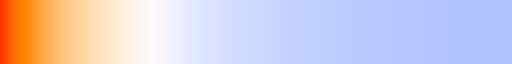

In [3]:
bb_cmap = plt.imread('bb.png')
new_cmap = ListedColormap(bb_cmap[0])
new_cmap

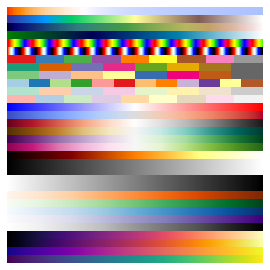

In [4]:
def plot_cmap(colormaps, pts, dpi=72,manual_cmaps=None):
    ny, nx = pts.shape
    ny *= len(colormaps)

    ## create a square image that has a precise number of pixels
    ##  a row for each colormap
    f, ax = plt.subplots(len(colormaps),1, figsize=(nx/dpi, ny/dpi), dpi=dpi)
    plt.subplots_adjust(wspace=0, hspace=0, bottom=0, top=1, left=0, right=1)

    ## plot a color gradient in each axis
    for i,c in enumerate(colormaps):
        ax[i].imshow(pts, aspect='equal', cmap=c)
        ax[i].axis('off')
        
    if manual_cmaps is not None:
        for i,cmap in enumerate(manual_cmaps):
            print('replacing',colormaps[i])
            ax[i].imshow(cmap,aspect='equal')

gradient = np.linspace(0, 1, 256)
colormapsList= ['viridis', 'plasma', 'inferno', 'magma',
        'Greys', 'Purples', 'Blues', 'Greens', 'Oranges',
        'binary', 'gist_yarg', 'gist_gray', 'gray', 'afmhot',
        'PiYG', 'PRGn', 'BrBG', 'RdGy', 'coolwarm', 'bwr',
        'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1',
        'flag', 'prism', 'ocean', 'gist_earth', 'terrain', new_cmap]


## thickness of each row in pixels
ny = 8

## create a grid of gradient points
pts = np.zeros((ny,gradient.size))
pts[:,] = gradient

## make image
plot_cmap(colormapsList[::-1], pts) #reversed order for consistency with Mahlet's version


plt.savefig("colormap.png", bbox_inches='tight',pad_inches=0)
plt.show()

colormapsList[-1] = 'blackbody'

## write colormap names out
with open("colormap_names.json",'w') as handle:
    handle.write('{"names":%s'%str(colormapsList).replace("'",'"')+'}')